Group data

C:\Users\Admin\AppData\Local\Temp\ipykernel_11876\1511757005.py:10: FutureWarning: The provided callable <function mean at 0x00000244A324D620> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = pd.merge(df1, df2, left_on='keyword', right_on='keyword', how='inner').groupby(['date', 'Cluster']).agg({


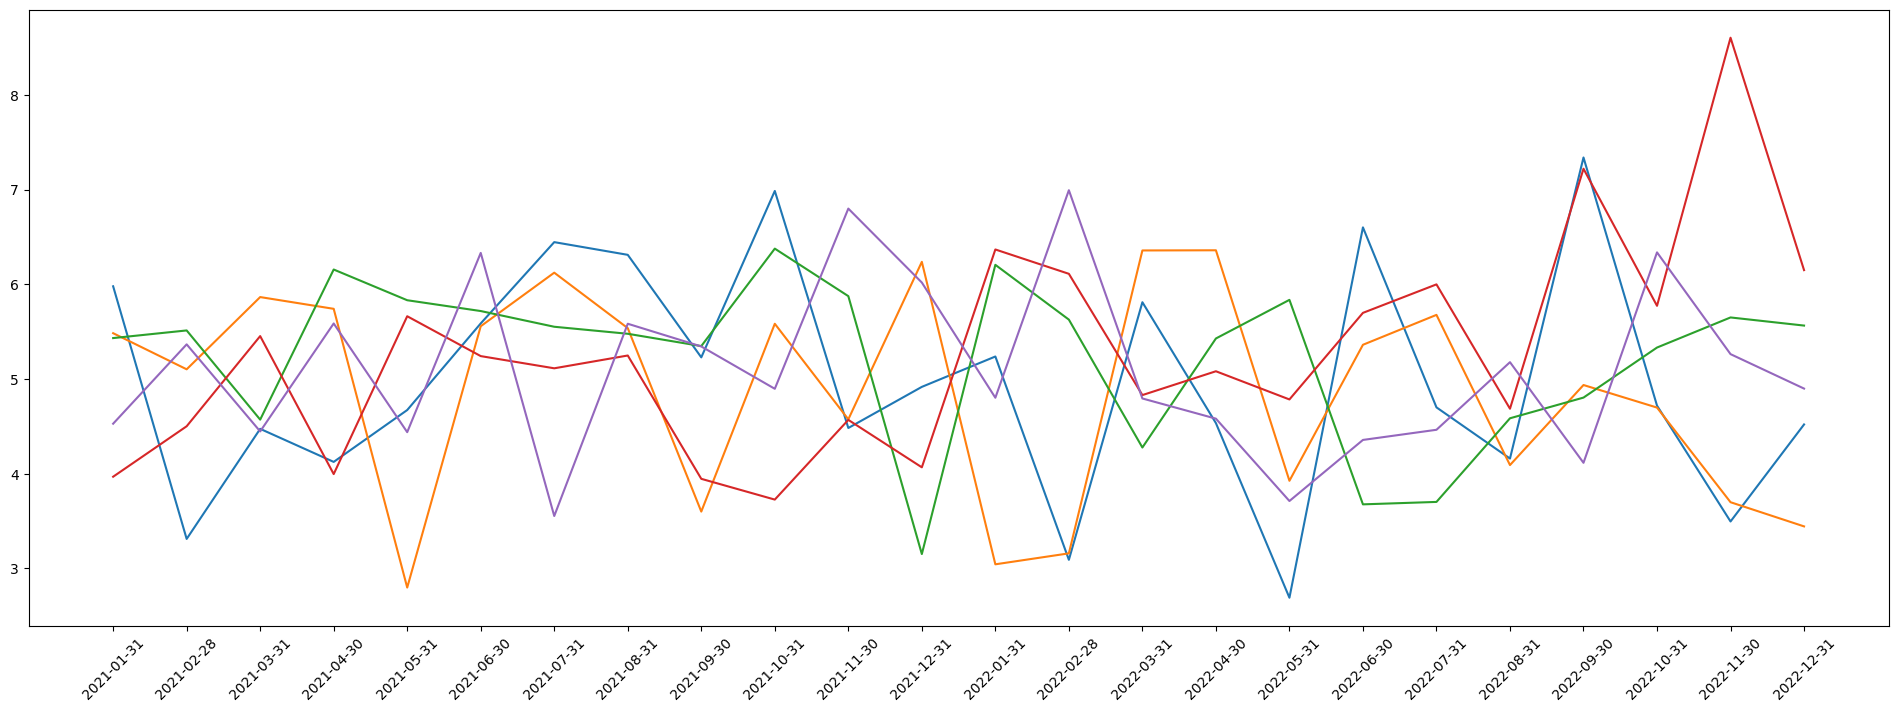

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
df1 = pd.read_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\synthesis\data.csv')
df2 = pd.read_csv(r'D:\CODING\Project\NVIDIA Stock prediction\data\synthesis\classification\BERT_EmbeddingText_classification.csv')

# Merge the DataFrames on 'keyword' and group by 'date' and 'Cluster'
df = pd.merge(df1, df2, left_on='keyword', right_on='keyword', how='inner').groupby(['date', 'Cluster']).agg({
    'cpc': np.mean,
    'keyword': list  # Keeping keyword as a list, but not used for plotting
}).reset_index()

# Drop 'keyword' column since it's not needed for the plot
df = df.drop('keyword', axis=1)

plt.figure(figsize=(24, 8))

df_pivot = df.pivot(index = 'date', columns='Cluster', values='cpc')

for cluster in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[cluster], label=f'Cluster {cluster}')
plt.xticks(rotation = 45)
plt.show()
